In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## Problem 1

### Predict the burnt area of forest fires with neural network

### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## IMPORT DATA

In [3]:
forest=pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


## EDA

In [4]:
# shape
forest.shape

(517, 31)

In [5]:
# information
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking whether any duplicated element are there and if present dropping them

In [7]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forest.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


### Droping oneshot encoded columns

In [9]:
forest1=forest.drop(forest.columns[11:30],axis=1)
forest1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
LB=LabelEncoder()

In [12]:
forest1["month"]=LB.fit_transform(forest1["month"])
forest1["day"]=LB.fit_transform(forest1["day"])
forest1["size_category"]=LB.fit_transform(forest1["size_category"])

In [13]:
forest1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


### visualization for identifying whether the data is normally distributed or not

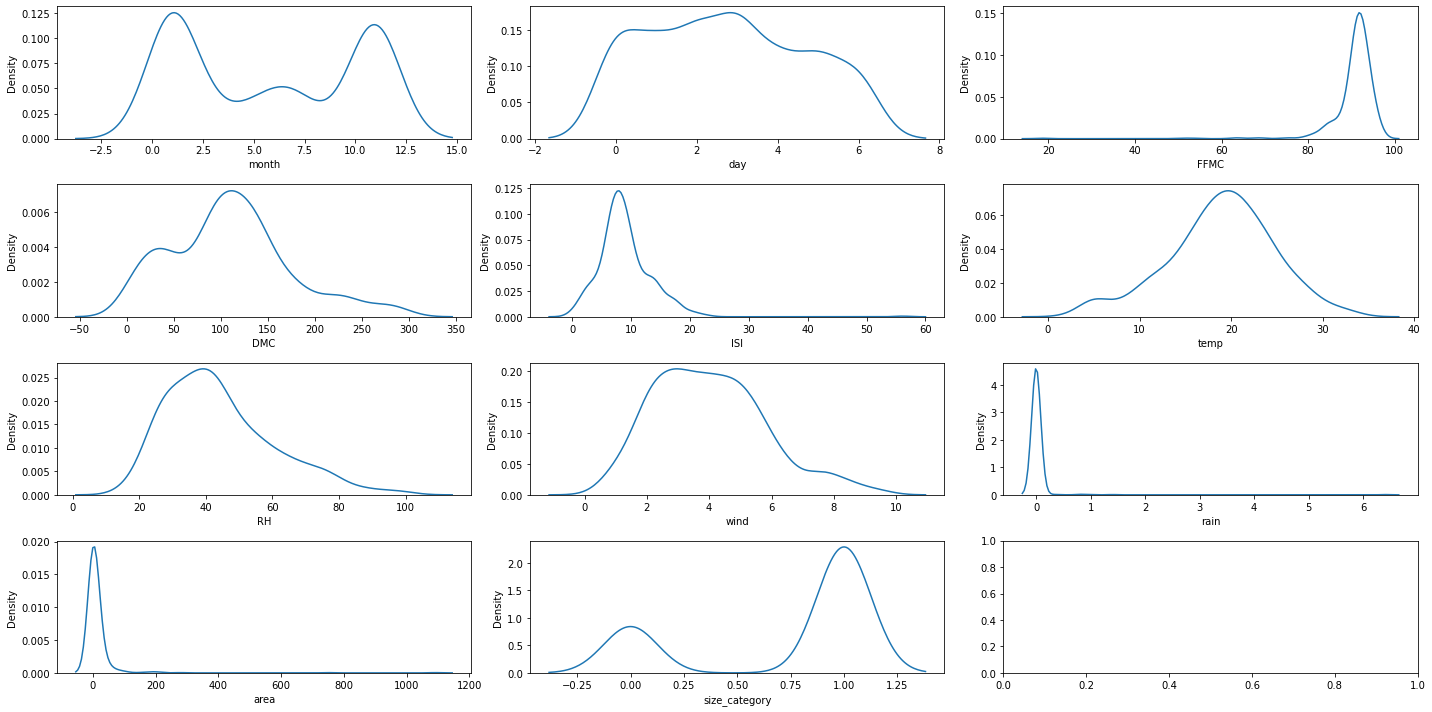

In [14]:
fig,ax=plt.subplots(4,3, figsize=(20,10))

sns.kdeplot(forest1["month"],ax=ax[0,0])
sns.kdeplot(forest1["day"],ax=ax[0,1])
sns.kdeplot(forest1["FFMC"],ax=ax[0,2])
sns.kdeplot(forest1["DMC"],ax=ax[1,0])
sns.kdeplot(forest1["ISI"],ax=ax[1,1])
sns.kdeplot(forest1["temp"],ax=ax[1,2])
sns.kdeplot(forest1["RH"],ax=ax[2,0])
sns.kdeplot(forest1["wind"],ax=ax[2,1])
sns.kdeplot(forest1["rain"],ax=ax[2,2])
sns.kdeplot(forest1["area"],ax=ax[3,0])
sns.kdeplot(forest1["size_category"],ax=ax[3,1])

plt.tight_layout()

### Boxpot - To check outliers

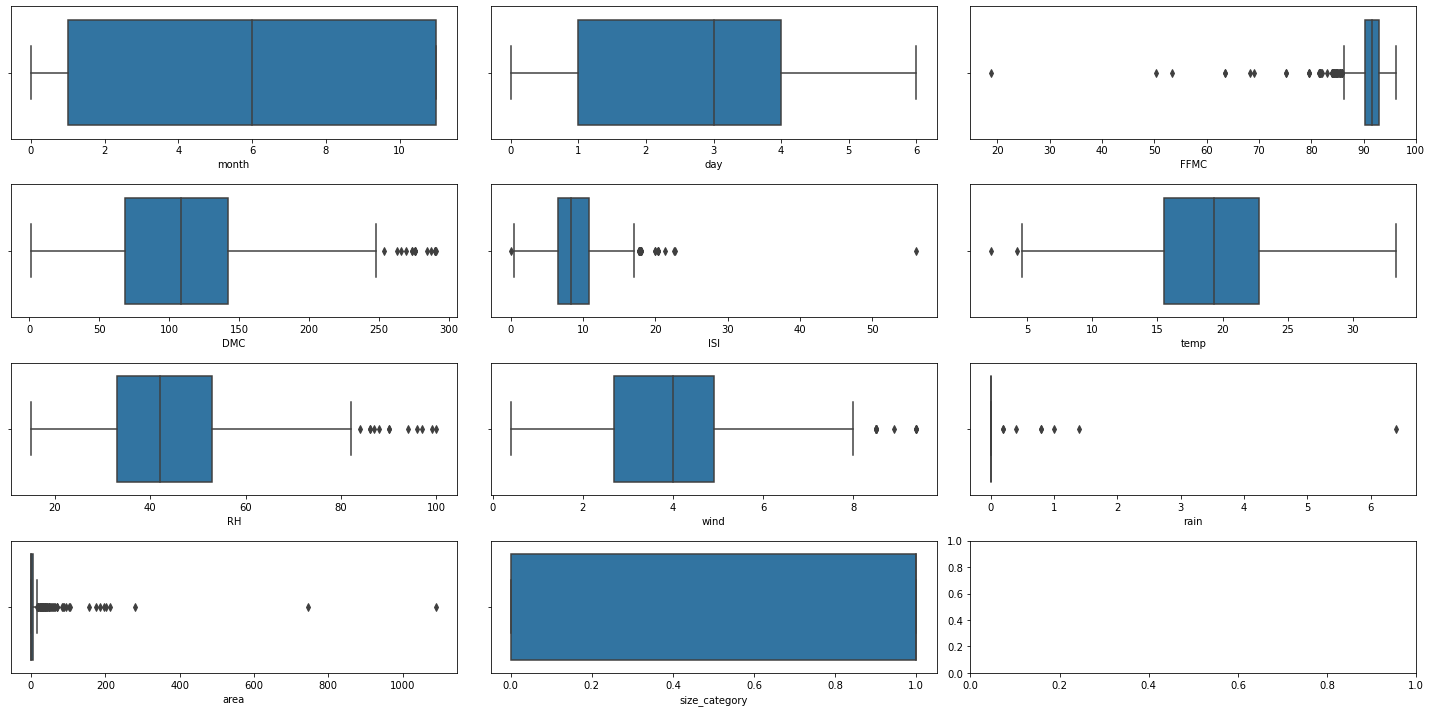

In [15]:
fig,ax=plt.subplots(4,3, figsize=(20,10))

sns.boxplot(forest1["month"],ax=ax[0,0])
sns.boxplot(forest1["day"],ax=ax[0,1])
sns.boxplot(forest1["FFMC"],ax=ax[0,2])
sns.boxplot(forest1["DMC"],ax=ax[1,0])
sns.boxplot(forest1["ISI"],ax=ax[1,1])
sns.boxplot(forest1["temp"],ax=ax[1,2])
sns.boxplot(forest1["RH"],ax=ax[2,0])
sns.boxplot(forest1["wind"],ax=ax[2,1])
sns.boxplot(forest1["rain"],ax=ax[2,2])
sns.boxplot(forest1["area"],ax=ax[3,0])
sns.boxplot(forest1["size_category"],ax=ax[3,1])

plt.tight_layout()

### Splitting the independent and target variables

In [16]:
x=forest1.iloc[:,:11]
y=forest1.iloc[:,-1]

### Constructing a sequential neural network with

### input neurons: 11 neurons

### hidden layer:  8 neurons

### output layer: 1 neurons

In [19]:
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [23]:
model=Sequential()
model.add(Dense(11,kernel_initializer="random_normal",activation="relu"))
model.add(Dense(8,kernel_initializer="random_normal",activation="linear"))
model.add(Dense(1,kernel_initializer="random_normal",activation="sigmoid"))

### Compiling model with

### Loss function: binary crossentropy

### optimizer: Adam

In [25]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Model fitting

In [26]:
model.fit(x,y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
35/35 [==============================] - 3s 23ms/step - loss: 0.6042 - accuracy: 0.7110 - val_loss: 0.7007 - val_accuracy: 0.6784
Epoch 2/150
35/35 [==============================] - 0s 7ms/step - loss: 0.5607 - accuracy: 0.7572 - val_loss: 0.6670 - val_accuracy: 0.6784
Epoch 3/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7601 - val_loss: 0.6825 - val_accuracy: 0.6842
Epoch 4/150
35/35 [==============================] - 0s 6ms/step - loss: 0.5402 - accuracy: 0.7601 - val_loss: 0.5945 - val_accuracy: 0.7018
Epoch 5/150
35/35 [==============================] - 0s 7ms/step - loss: 0.5284 - accuracy: 0.7717 - val_loss: 0.5993 - val_accuracy: 0.7076
Epoch 6/150
35/35 [==============================] - 0s 6ms/step - loss: 0.4964 - accuracy: 0.7832 - val_loss: 0.5917 - val_accuracy: 0.7193
Epoch 7/150
35/35 [==============================] - 0s 7ms/step - loss: 0.4559 - accuracy: 0.7919 - val_loss: 0.5106 - val_accuracy: 0.7661
Epoch 8/150


Epoch 59/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9971 - val_loss: 0.1062 - val_accuracy: 0.9532
Epoch 60/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0230 - accuracy: 0.9942 - val_loss: 0.0725 - val_accuracy: 0.9591
Epoch 61/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9855 - val_loss: 0.0889 - val_accuracy: 0.9591
Epoch 62/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0303 - accuracy: 0.9884 - val_loss: 0.0795 - val_accuracy: 0.9532
Epoch 63/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0193 - accuracy: 0.9971 - val_loss: 0.1093 - val_accuracy: 0.9532
Epoch 64/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0403 - accuracy: 0.9827 - val_loss: 0.1370 - val_accuracy: 0.9474
Epoch 65/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0286 - accuracy: 0.9884 - val_loss: 0.0811 - val_accuracy: 0.9532
Epoch 

### Model Evaluation

In [27]:
score = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: 0.0441 - accuracy: 0.9826
accuracy: 98.26%


In [28]:
history=model.fit(x,y, validation_split=0.33, epochs=150, batch_size= 10)

Epoch 1/150
35/35 [==============================] - 0s 10ms/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.0815 - val_accuracy: 0.9532
Epoch 2/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0207 - accuracy: 0.9913 - val_loss: 0.0783 - val_accuracy: 0.9591
Epoch 3/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9971 - val_loss: 0.0645 - val_accuracy: 0.9649
Epoch 4/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.0788 - val_accuracy: 0.9591
Epoch 5/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0273 - accuracy: 0.9884 - val_loss: 0.1609 - val_accuracy: 0.9532
Epoch 6/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0415 - accuracy: 0.9827 - val_loss: 0.1377 - val_accuracy: 0.9474
Epoch 7/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0991 - val_accuracy: 0.9649
Epoch 8/150


35/35 [==============================] - 0s 10ms/step - loss: 0.0112 - accuracy: 0.9942 - val_loss: 0.0844 - val_accuracy: 0.9591
Epoch 116/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 0.9942 - val_loss: 0.0741 - val_accuracy: 0.9649
Epoch 117/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0807 - val_accuracy: 0.9649
Epoch 118/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0128 - accuracy: 0.9942 - val_loss: 0.0791 - val_accuracy: 0.9708
Epoch 119/150
35/35 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0738 - val_accuracy: 0.9649
Epoch 120/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0166 - accuracy: 0.9942 - val_loss: 0.0730 - val_accuracy: 0.9649
Epoch 121/150
35/35 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9649
Epoch 122/15

### List all the evaulation metric in build model(history)

In [30]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Visualization with model accuracy for train and test data

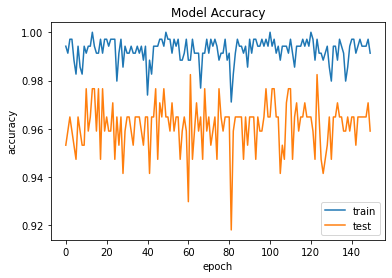

In [33]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train","test"], loc="lower right")
plt.show()

### Visualising the model history for the train and test loss

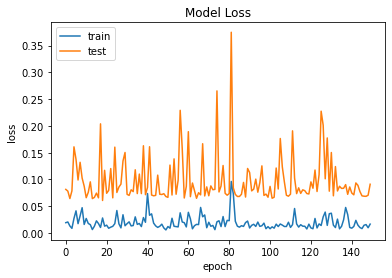

In [34]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train","test"], loc="upper left")
plt.show()

#### ============================================================================================================================